# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [27]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [28]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


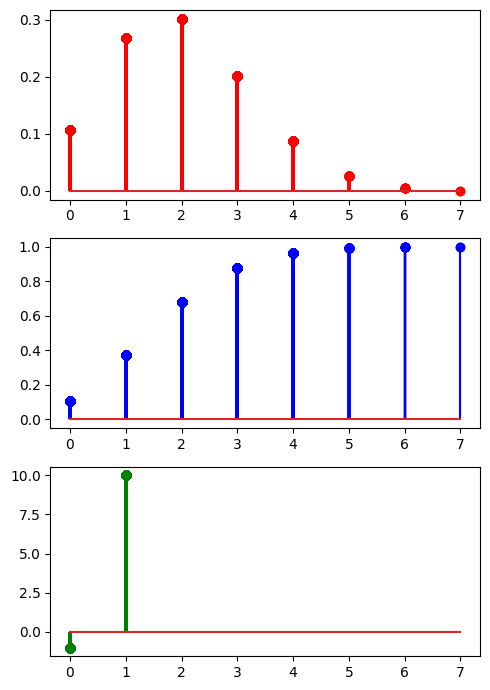

In [29]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [30]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

#  Funciones para NORMAL

def dnorm(x, mean=0, sd=1):
    """
    Densidad de la distribución normal N(mean, sd²) evaluada en x.
    """
    return norm.pdf(x, loc=mean, scale=sd)

def pnorm(q, mean=0, sd=1):
    """
    Función de distribución acumulada (CDF) de N(mean, sd²) evaluada en q.
    """
    return norm.cdf(q, loc=mean, scale=sd)

def qnorm(p, mean=0, sd=1):
    """
    Función cuantil (inversa de la CDF) de N(mean, sd²) para la probabilidad p.
    """
    return norm.ppf(p, loc=mean, scale=sd)

def rnorm(n, mean=0, sd=1):
    """
    Genera n valores aleatorios de N(mean, sd²).
    """
    return norm.rvs(loc=mean, scale=sd, size=n)

#  Funciones para UNIFORME

def dunif(x, a=0, b=1):
    """
    Densidad de la distribución uniforme U(a, b) evaluada en x.
    """
    return uniform.pdf(x, loc=a, scale=b - a)

def punif(q, a=0, b=1):
    """
    CDF de U(a, b) evaluada en q.
    """
    return uniform.cdf(q, loc=a, scale=b - a)

def qunif(p, a=0, b=1):
    """
    Cuantil de U(a, b) para la probabilidad p.
    """
    return uniform.ppf(p, loc=a, scale=b - a)

def runif(n, a=0, b=1):
    """
    Genera n valores aleatorios de U(a, b).
    """
    return uniform.rvs(loc=a, scale=b - a, size=n)

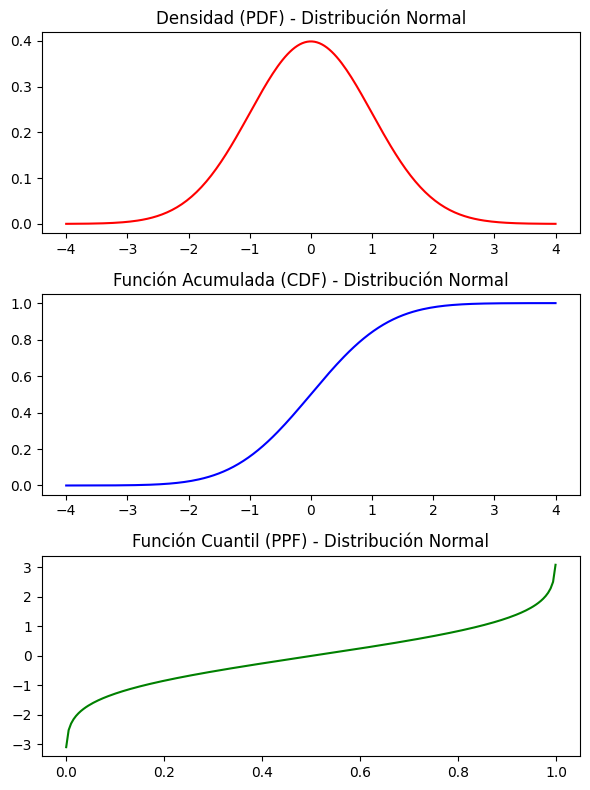

In [31]:
# Fijar semilla para resultados reproducibles
np.random.seed(42)

# Parámetros de la distribución normal
mean = 0
sd = 1

# Rango de valores para evaluar las funciones
data = np.linspace(-4, 4, 200)

# Calcular funciones
pdf = norm.pdf(data, loc=mean, scale=sd)  # Densidad
cdf = norm.cdf(data, loc=mean, scale=sd)  # Acumulada
ppf = norm.ppf(np.linspace(0.001, 0.999, 200), loc=mean, scale=sd)  # Cuantil

# Graficar
fig, axis = plt.subplots(3, 1, figsize=(6, 8))

axis[0].plot(data, pdf, 'r-')
axis[0].set_title("Densidad (PDF) - Distribución Normal")

axis[1].plot(data, cdf, 'b-')
axis[1].set_title("Función Acumulada (CDF) - Distribución Normal")

axis[2].plot(np.linspace(0.001, 0.999, 200), ppf, 'g-')
axis[2].set_title("Función Cuantil (PPF) - Distribución Normal")

plt.tight_layout()
plt.show()

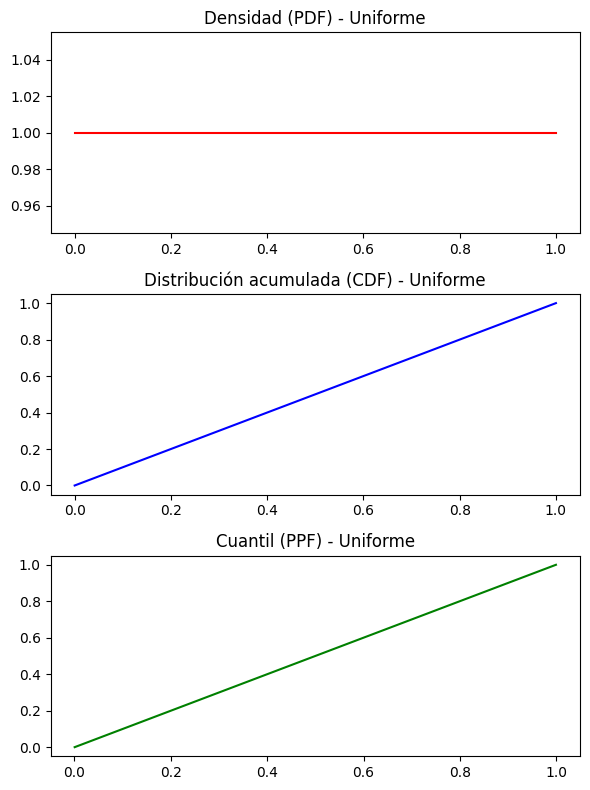

In [32]:
# Parámetros
a = 0
b = 1

# Datos
data = np.linspace(a, b, 200)
pdf = uniform.pdf(data, loc=a, scale=b - a)
cdf = uniform.cdf(data, loc=a, scale=b - a)
ppf = uniform.ppf(np.linspace(0.001, 0.999, 200), loc=a, scale=b - a)

# Graficar
fig, axis = plt.subplots(3, 1, figsize=(6, 8))

axis[0].plot(data, pdf, 'r-')
axis[0].set_title("Densidad (PDF) - Uniforme")

axis[1].plot(data, cdf, 'b-')
axis[1].set_title("Distribución acumulada (CDF) - Uniforme")

axis[2].plot(np.linspace(0.001, 0.999, 200), ppf, 'g-')
axis[2].set_title("Cuantil (PPF) - Uniforme")

plt.tight_layout()
plt.show()